In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
original_df = pd.read_csv(r'C:\Users\tulik\Desktop\IGDTUW\ML\ML Lab\predicomm\predicomm\dataset\commodity_futures.csv')
df = original_df.copy()
df.head()

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,03-01-2000,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,04-01-2000,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,05-01-2000,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,06-01-2000,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,07-01-2000,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


In [57]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [58]:
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
6088,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
6089,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
6090,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [59]:
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# Reindex the DataFrame to include all dates in the range
df = df.set_index('Date').reindex(date_range).reset_index()

# Rename the index column back to 'Date'
df.rename(columns={'index': 'Date'}, inplace=True)

df.to_csv(r'C:\Users\tulik\Desktop\IGDTUW\ML\ML Lab\commodity-price-forecasting\dataset\commodity_futures_with alldates.csv', index=False)

In [60]:
df = df.ffill()
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
8611,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
8612,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
8613,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [61]:
df = df.bfill()
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,2.176,283.7,25.55,24.39,456.50,200.75,0.8480,5.375,213.50,...,1237.50,67.78,8446.0,247.50,6.10,188.88,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,188.88,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,188.88,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,188.88,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,188.88,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
8611,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
8612,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
8613,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [62]:
df = df.set_index('Date')
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


df = df[df.applymap(is_numeric).all(axis=1)]

df.to_csv('final.csv')

C:\Users\tulik\AppData\Local\Temp\ipykernel_29900\2202947183.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df.applymap(is_numeric).all(axis=1)]


In [63]:
df = df[df.index.year >= 2018]
temp = df.copy()
df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2.953,1309.3,60.42,66.87,951.75,350.75,3.3005,17.145,600.25,123.000,...,3335.00,207.55,12714.00,427.00,15.16,179.92,126.20,71.775,427.25,78.63
2018-01-02,3.056,1316.1,60.37,66.57,955.00,353.25,3.2780,17.206,597.00,123.350,...,3369.00,205.84,12568.50,433.50,15.33,176.31,130.20,70.725,434.75,77.50
2018-01-03,3.008,1318.5,61.63,67.84,959.75,353.00,3.2575,17.267,606.75,122.950,...,3343.50,208.80,12361.75,436.00,15.31,179.74,128.60,71.050,441.00,78.11
2018-01-04,2.880,1321.6,62.01,68.07,959.25,351.00,3.2630,17.269,608.00,122.250,...,3382.50,207.70,12599.00,434.00,15.25,180.67,129.55,71.375,439.75,79.25
2018-01-05,2.795,1322.3,61.44,67.62,961.50,351.25,3.2295,17.285,604.00,119.250,...,3380.00,205.87,12481.00,430.75,15.08,178.58,128.45,71.425,437.50,78.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,178.050,...,2571.31,299.09,22127.00,665.75,24.11,292.90,164.65,104.125,812.75,85.44
2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,179.500,...,2574.80,302.34,22189.00,652.25,24.39,287.30,164.55,103.675,804.50,86.87
2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,178.025,...,2486.50,300.43,21379.00,640.00,24.20,277.58,166.95,102.675,787.00,85.08


<Figure size 1400x800 with 0 Axes>

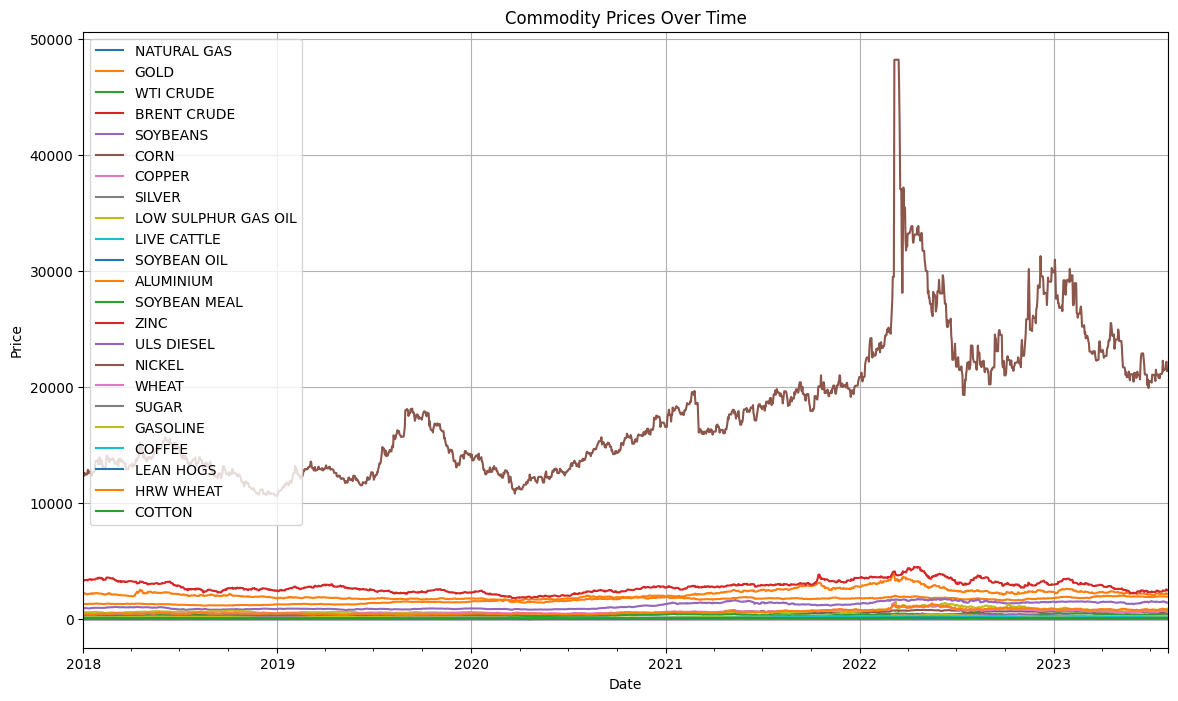

In [64]:
# Plot the closing price of all commodities over time
plt.figure(figsize=(14, 8))
df.plot(figsize=(14, 8))
plt.title('Commodity Prices Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

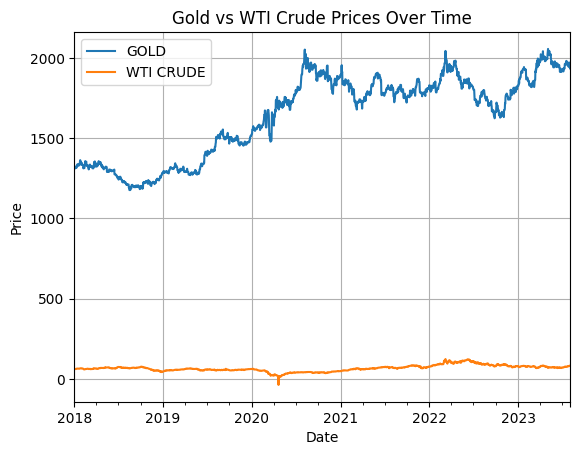

In [65]:
# Plot a few selected commodities (e.g., Gold and WTI Crude)
plt.figure(figsize=(14, 8))
df[['GOLD', 'WTI CRUDE']].plot()
plt.title('Gold vs WTI Crude Prices Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


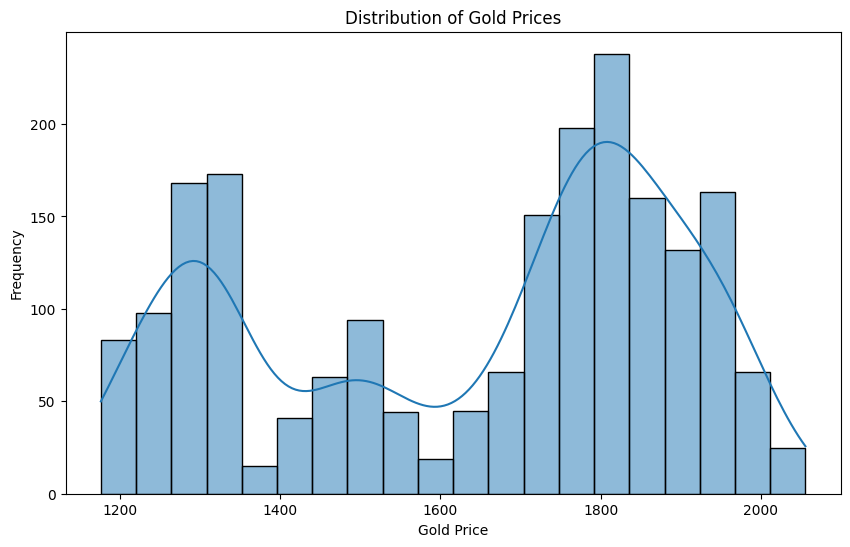

In [66]:
# Plot distribution of a commodity (e.g., Gold)
plt.figure(figsize=(10, 6))
sns.histplot(df['GOLD'], kde=True, bins=20)
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.show()


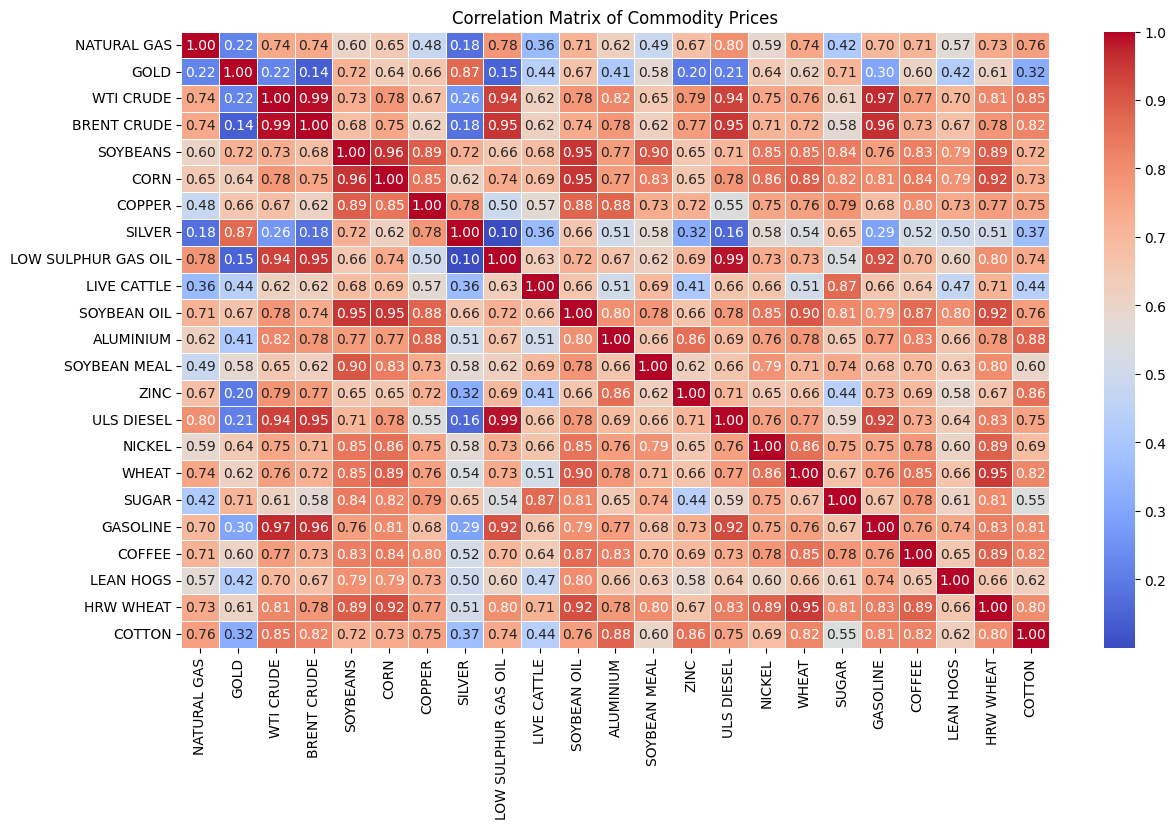

In [67]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Commodity Prices')
plt.show()


In [68]:

def feature_analysis(target_column, data):
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Standardize the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # 1. Correlation
    correlations = X.corrwith(y).abs()
    top_corr_features = correlations[correlations > 0.6].index.tolist()

    # 2. Multicollinearity (VIF)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    top_vif_features = vif_data[vif_data['VIF'] < 5]['Feature'].tolist()

    # 3. Mutual Information Gain
    mi_scores = mutual_info_regression(X_scaled, y)
    mi_features = X.columns[mi_scores > np.mean(mi_scores)].tolist()

    # 4. K Best Features
    selector = SelectKBest(score_func=f_regression, k=5)
    selector.fit(X_scaled, y)
    k_best_features = X.columns[selector.get_support()].tolist()

    feature_counts = pd.Series(
        top_corr_features + top_vif_features + mi_features + k_best_features
    ).value_counts()
    selected_features = feature_counts[feature_counts >= 3].index.tolist()

    return {
        "Correlation": top_corr_features,
        "High Multicollinearity Features": top_vif_features,
        "Mutual Information": mi_features,
        "K Best Features": k_best_features,
        "Selected Features (>= 3 methods)": selected_features
    }, selected_features

# Example: Analyze features for a specific target column
target_column = 'SOYBEANS'  # Replace with your main column
result, selected_features = feature_analysis(target_column, df)

# Display results
for method, features in result.items():
    print(f"{method}: {features}")

Correlation: ['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'CORN', 'COPPER', 'SILVER', 'LOW SULPHUR GAS OIL', 'LIVE CATTLE', 'SOYBEAN OIL', 'ALUMINIUM', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL', 'NICKEL', 'WHEAT', 'SUGAR', 'GASOLINE', 'COFFEE', 'LEAN HOGS', 'HRW WHEAT', 'COTTON']
High Multicollinearity Features: []
Mutual Information: ['WTI CRUDE', 'CORN', 'COPPER', 'LIVE CATTLE', 'SOYBEAN OIL', 'SOYBEAN MEAL', 'ULS DIESEL', 'WHEAT', 'SUGAR', 'GASOLINE', 'COFFEE', 'HRW WHEAT', 'COTTON']
K Best Features: ['CORN', 'COPPER', 'SOYBEAN OIL', 'SOYBEAN MEAL', 'HRW WHEAT']
Selected Features (>= 3 methods): ['CORN', 'COPPER', 'SOYBEAN MEAL', 'HRW WHEAT', 'SOYBEAN OIL']


<Figure size 1400x800 with 0 Axes>

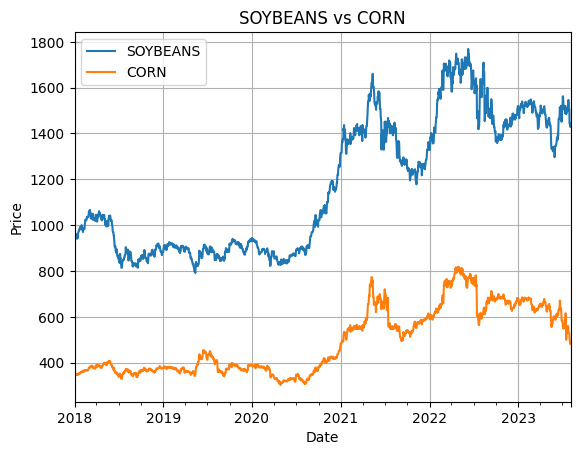

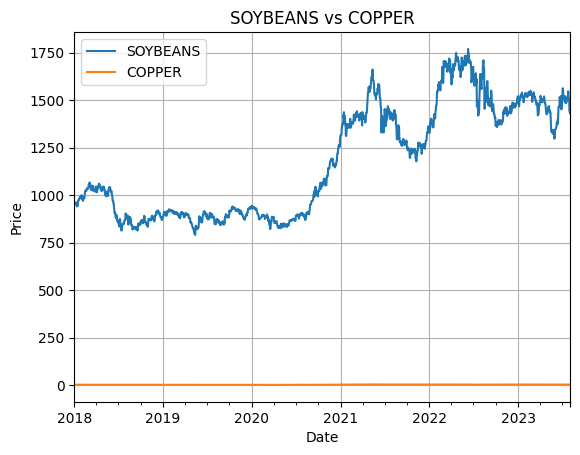

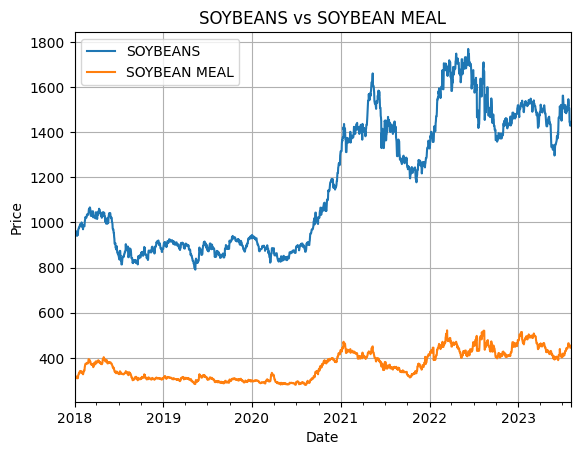

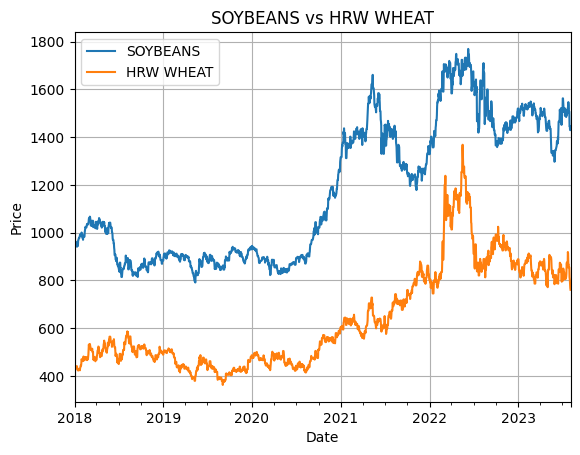

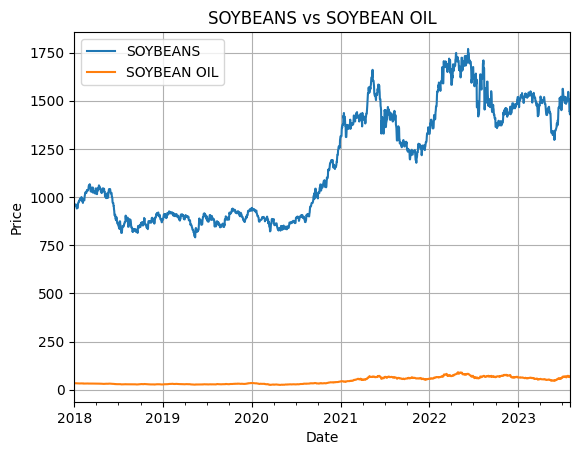

In [69]:
# Plot a few selected commodities (e.g., Gold and WTI Crude)
plt.figure(figsize=(14, 8))
for i in selected_features:
    df[[target_column, i]].plot()
    plt.title(f'{target_column} vs {i}')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [70]:
# from statsmodels.tsa.seasonal import seasonal_decompose


# analysis = df[[target_column]].copy()


# decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

# trend = decompose_result_mult.trend
# seasonal = decompose_result_mult.seasonal
# residual = decompose_result_mult.resid

# decompose_result_mult.plot()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

Train set size: (1461, 26)
Validation set size: (365, 26)
Test set size: (216, 26)
Model Performance Metrics:
Linear Regression:
  Validation RMSE: 113.6976
  Test RMSE: 91.3797
  Validation Accuracy: 0.9409
  Test Accuracy: 0.9448

Random Forest:
  Validation RMSE: 101.9487
  Test RMSE: 87.8387
  Validation Accuracy: 0.9441
  Test Accuracy: 0.9478

XGBoost:
  Validation RMSE: 95.1804
  Test RMSE: 78.8158
  Validation Accuracy: 0.9479
  Test Accuracy: 0.9520



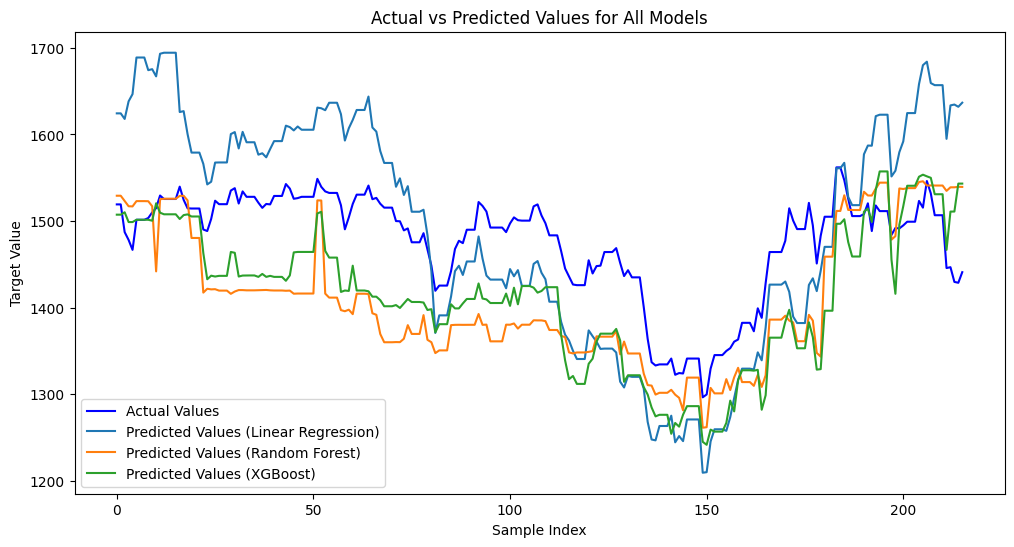

In [84]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

df["Year"] = df.index.year

train = df[df["Year"] <= 2021]
validate = df[(df["Year"] > 2021) & (df["Year"] <= 2022)]
test = df[df["Year"] > 2022]

print("Train set size:", train.shape)
print("Validation set size:", validate.shape)
print("Test set size:", test.shape)

X_train, y_train = train[selected_features], train[target_column]
X_validate, y_validate = validate[selected_features], validate[target_column]
X_test, y_test = test[selected_features], test[target_column]

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_validate)
    y_test_pred = model.predict(X_test)
    predictions[model_name] = y_test_pred
    rmse_val = np.sqrt(mean_squared_error(y_validate, y_val_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    accuracy_val = 1 - (np.sum(np.abs(y_validate - y_val_pred)) / np.sum(np.abs(y_validate)))
    accuracy_test = 1 - (np.sum(np.abs(y_test - y_test_pred)) / np.sum(np.abs(y_test)))
    results[model_name] = {
        "Validation RMSE": rmse_val,
        "Test RMSE": rmse_test,
        "Validation Accuracy": accuracy_val,
        "Test Accuracy": accuracy_test,
    }

print("Model Performance Metrics:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Validation RMSE: {metrics['Validation RMSE']:.4f}")
    print(f"  Test RMSE: {metrics['Test RMSE']:.4f}")
    print(f"  Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}\n")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Values", color="blue")
for model_name, y_test_pred in predictions.items():
    plt.plot(y_test_pred, label=f"Predicted Values ({model_name})")
plt.title("Actual vs Predicted Values for All Models")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()


In [73]:
from datetime import timedelta

In [74]:
forecast_period = 30

In [75]:
df['Shifted_Target'] = df[target_column].shift(-forecast_period)

df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,Year,Shifted_Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2.953,1309.3,60.42,66.87,951.75,350.75,3.3005,17.145,600.25,123.000,...,12714.00,427.00,15.16,179.92,126.20,71.775,427.25,78.63,2018,995.75
2018-01-02,3.056,1316.1,60.37,66.57,955.00,353.25,3.2780,17.206,597.00,123.350,...,12568.50,433.50,15.33,176.31,130.20,70.725,434.75,77.50,2018,985.00
2018-01-03,3.008,1318.5,61.63,67.84,959.75,353.00,3.2575,17.267,606.75,122.950,...,12361.75,436.00,15.31,179.74,128.60,71.050,441.00,78.11,2018,978.75
2018-01-04,2.880,1321.6,62.01,68.07,959.25,351.00,3.2630,17.269,608.00,122.250,...,12599.00,434.00,15.25,180.67,129.55,71.375,439.75,79.25,2018,978.75
2018-01-05,2.795,1322.3,61.44,67.62,961.50,351.25,3.2295,17.285,604.00,119.250,...,12481.00,430.75,15.08,178.58,128.45,71.425,437.50,78.01,2018,978.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,178.050,...,22127.00,665.75,24.11,292.90,164.65,104.125,812.75,85.44,2023,NaN
2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,179.500,...,22189.00,652.25,24.39,287.30,164.55,103.675,804.50,86.87,2023,NaN
2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,178.025,...,21379.00,640.00,24.20,277.58,166.95,102.675,787.00,85.08,2023,NaN


In [76]:

train_data = df.dropna(subset=['Shifted_Target'])

# Test data starts where the shifted target becomes NaN
test_data = df[df['Shifted_Target'].isna()]

# Prepare training and test data
X_train = train_data.drop(columns=[target_column, 'Shifted_Target'])
y_train = train_data['Shifted_Target']

X_test = test_data.drop(columns=[target_column, 'Shifted_Target']).iloc[:forecast_period]
last_date = df.index[-1]

# Train a model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for test data
y_pred = model.predict(X_test)

# Generate future dates starting from the last known date
future_dates = [last_date + timedelta(days=i + 1) for i in range(len(y_pred))]

# Combine results into a DataFrame
results = pd.DataFrame({
    'Date': future_dates,
    f'Predicted {target_column}': y_pred
})

# Display results
print("Future Predictions:")
print(results)


Future Predictions:
         Date  Predicted SOYBEANS
0  2023-08-05         1475.629155
1  2023-08-06         1464.160762
2  2023-08-07         1464.160762
3  2023-08-08         1464.160762
4  2023-08-09         1464.617905
5  2023-08-10         1470.684500
6  2023-08-11         1481.811167
7  2023-08-12         1484.396250
8  2023-08-13         1488.338250
9  2023-08-14         1488.338250
10 2023-08-15         1488.338250
11 2023-08-16         1493.170417
12 2023-08-17         1443.806893
13 2023-08-18         1440.188917
14 2023-08-19         1478.957333
15 2023-08-20         1472.621167
16 2023-08-21         1472.621167
17 2023-08-22         1472.621167
18 2023-08-23         1496.308833
19 2023-08-24         1508.153000
20 2023-08-25         1495.655042
21 2023-08-26         1496.036917
22 2023-08-27         1493.659500
23 2023-08-28         1493.659500
24 2023-08-29         1493.659500
25 2023-08-30         1500.507333
26 2023-08-31         1508.064500
27 2023-09-01         1493.4

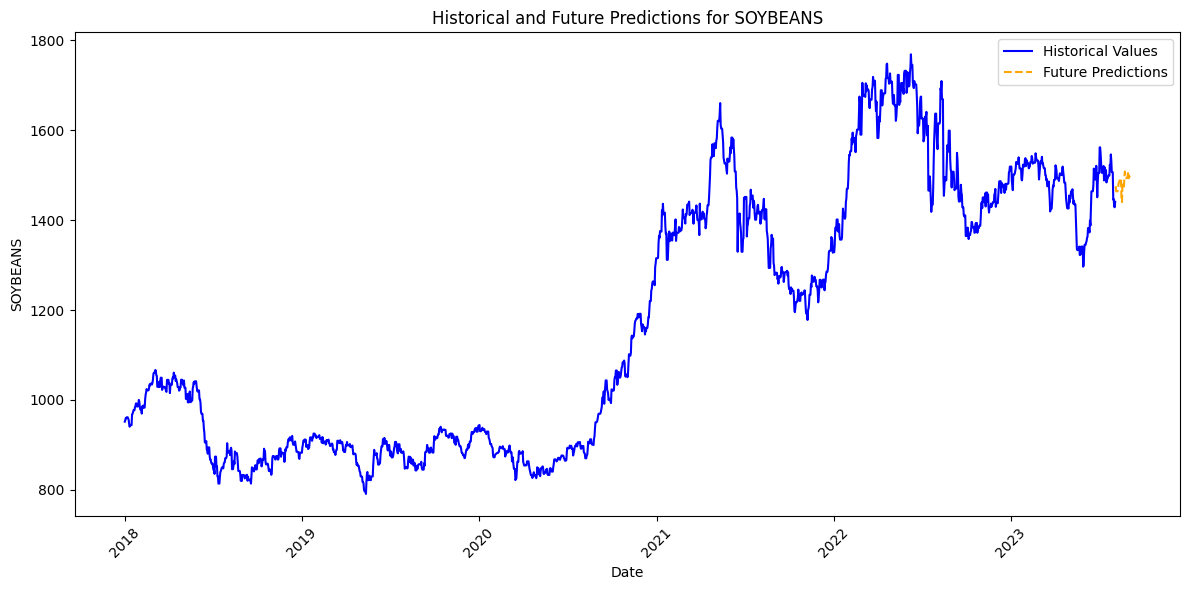

In [77]:
plt.figure(figsize=(12, 6))

# Plot historical values
plt.plot(df.index, df[target_column], label='Historical Values', color='blue')

# Plot future predictions
plt.plot(results['Date'], results[f'Predicted {target_column}'], label='Future Predictions', color='orange', linestyle='--')

plt.title(f"Historical and Future Predictions for {target_column}")
plt.xlabel("Date")
plt.ylabel(target_column)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
categories = {
    "Energy": [
        "Natural Gas",
        "Low Sulphur Gas Oil",
        "WTI Crude",
        "Brent Crude",
        "ULS Diesel",
        "Gasoline",
    ],
    "Industrial Metals": [
        "Copper",
        "Aluminum",
        "Zinc",
        "Nickel",
    ],
    "Precious Metals": [
        "Gold",
        "Silver",
    ],
    "Grains": [
        "Corn",
        "Soybeans",
        "Wheat",
        "Soybean Oil",
        "Soybean Meal",
        "HRW Wheat",
    ],
    "Livestock": [
        "Live cattle",
        "Lean Hogs",
    ],
    "Softs": [
        "Sugar",
        "Coffee",
        "Cotton",
    ],
}



In [79]:
# df = original_df.copy()
# df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
# date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# # Reindex the DataFrame to include all dates in the range
# df = df.set_index('Date').reindex(date_range).reset_index()

# # Rename the index column back to 'Date'
# df.rename(columns={'index': 'Date'}, inplace=True)
# df.reset_index(drop=True, inplace=True)

# # Ensure 'Date' is a datetime object and set as the index
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')
# df = df.ffill()
# df = df.bfill()

# # -------------------------
# df_2022 = df[df.index.year == 2022]
# df_2023 = df[df.index.year >= 2023]


# import matplotlib.dates as mdates

# plt.figure(figsize=(12, 6))

# # Plot historical values for 2022 as the base trend
# plt.plot(df_2022.index, df_2022[target_column], label='Historical Values 2022', color='blue')

# # Adjust 2023 dates to overlap with 2022
# df_2023_shifted = df_2023.copy()
# df_2023_shifted.index = df_2023_shifted.index.map(lambda x: x.replace(year=2022))

# # Adjust future predictions to overlap with 2022
# results_shifted = results.copy()
# results_shifted['Date'] = results_shifted['Date'].map(lambda x: x.replace(year=2022))

# # Plot 2023 values on the same x-axis
# plt.plot(df_2023_shifted.index, df_2023[target_column], label='Historical Values 2023', color='red', alpha=0.7)

# # Plot future predictions on the same x-axis
# plt.plot(results_shifted['Date'], results_shifted[f'Predicted {target_column}'], label='Future Predictions', color='orange', linestyle='--', alpha=0.7)

# # Title and labels
# plt.title(f"Historical and Future Predictions for {target_column} (Overlayed)")
# plt.xlabel("Date")
# plt.ylabel(target_column)
# plt.legend()

# # Format x-axis for 2022 (primary axis)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display months only
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.xticks(rotation=45)

# # Add a secondary x-axis for the original 2023 and future prediction timeline
# sec_ax = plt.gca().twiny()

# # Use the original 2023 and results timeline for the secondary axis
# sec_ax.set_xlim(df_2023.index.min(), results['Date'].max())
# sec_ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# sec_ax.xaxis.set_major_locator(mdates.MonthLocator())
# sec_ax.set_xlabel("Date (2023 and Predictions)")

# plt.tight_layout()
# plt.show()



In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


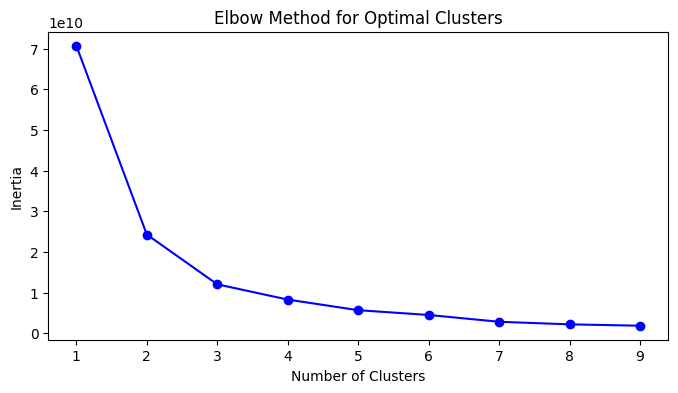

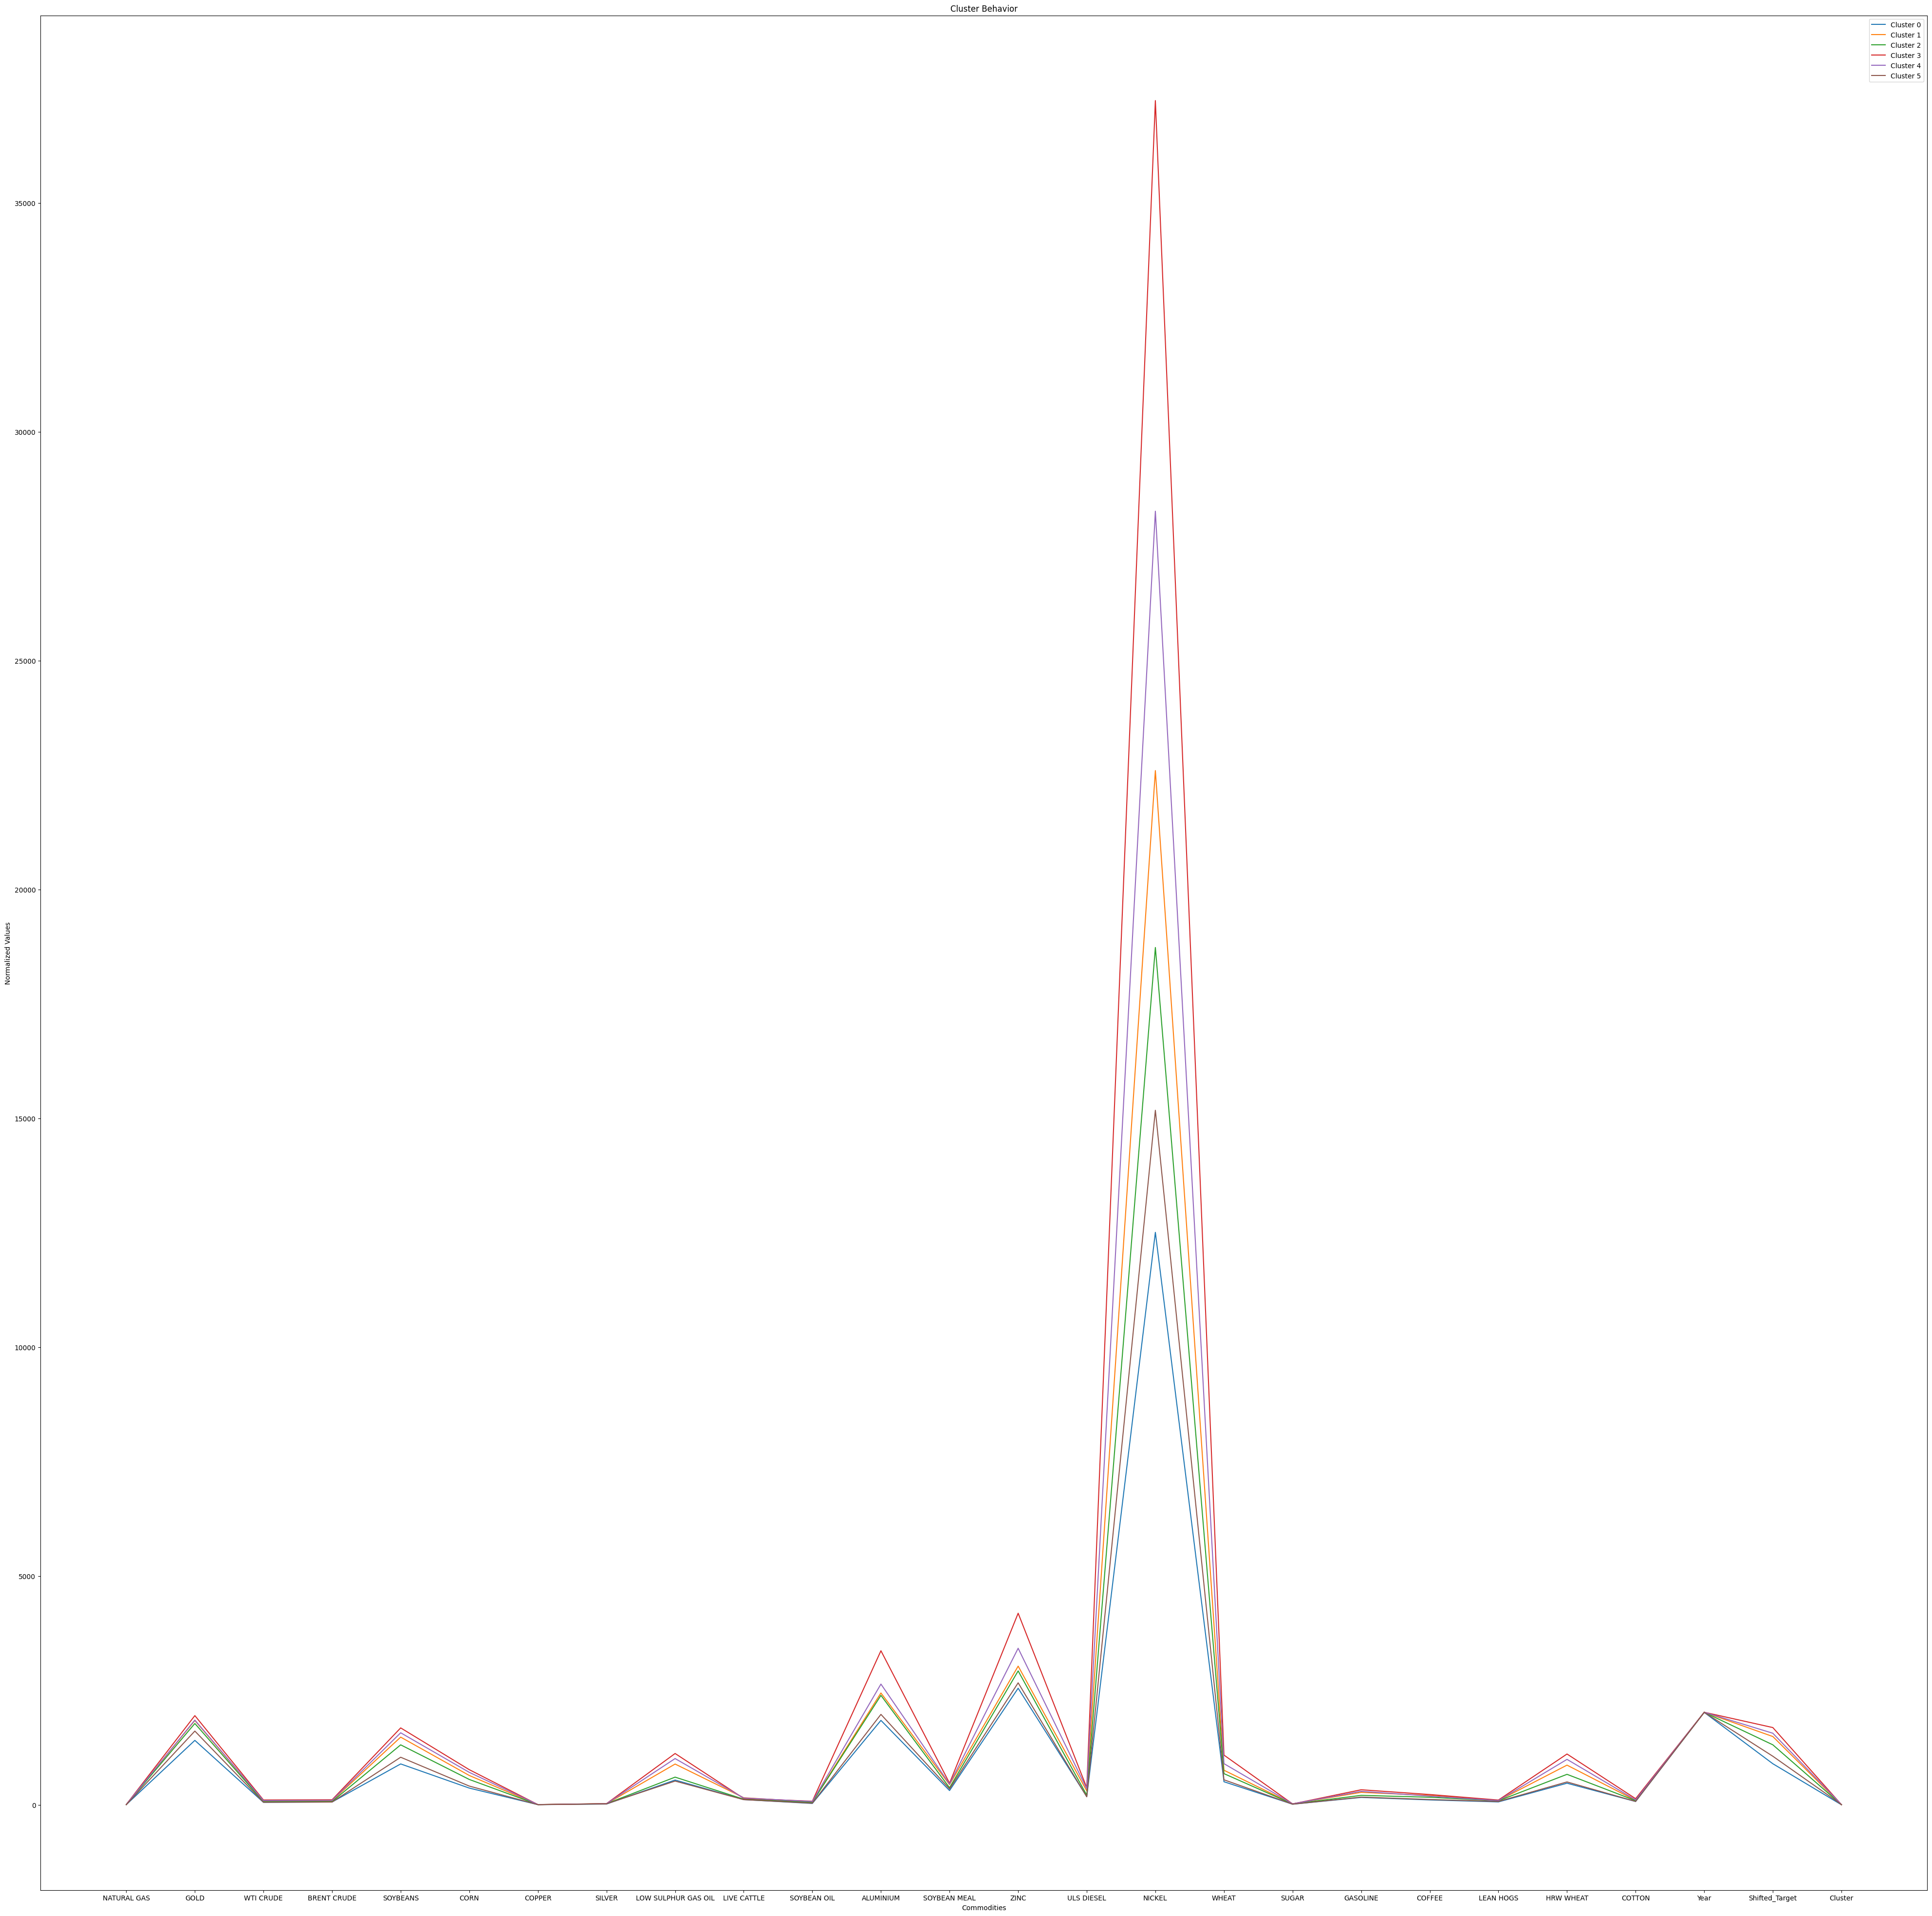

In [81]:


# # Normalize the data
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(temp)

# Determine the optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(temp)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o', color='b')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=6, random_state=42).fit(temp)
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(50, 50))
for cluster in sorted(df['Cluster'].unique()):
    plt.plot(df[df['Cluster'] == cluster].mean(), label=f"Cluster {cluster}")
plt.legend()
plt.title("Cluster Behavior")
plt.xlabel("Commodities")
plt.ylabel("Normalized Values")
plt.show()


In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

C:\Users\tulik\AppData\Local\Temp\ipykernel_29900\3793783891.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_df['Cluster'] = kmeans.fit_predict(scaled_data)


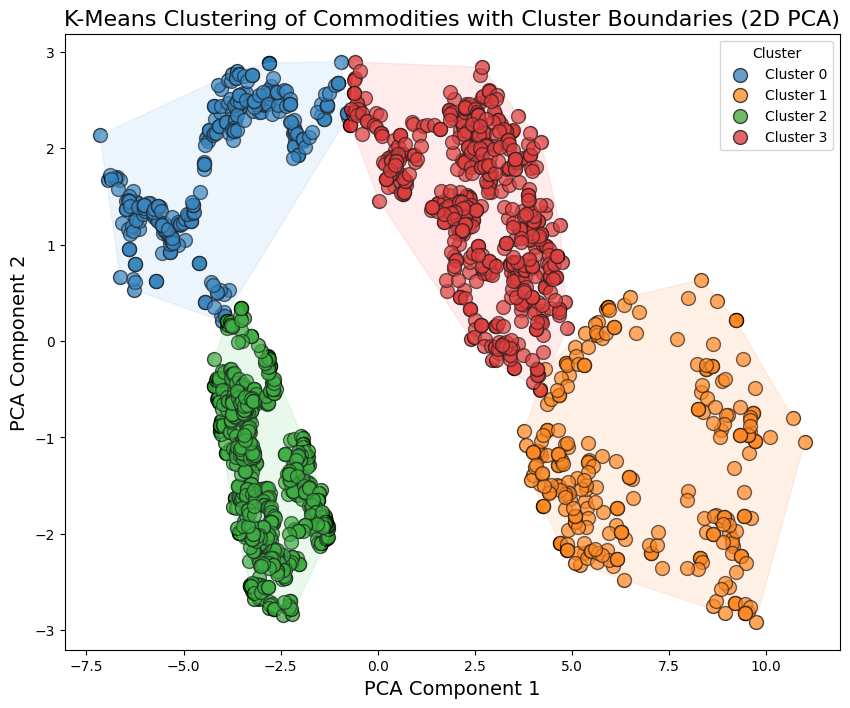

PCA Component 1 explains 71.33% of the variance.
PCA Component 2 explains 11.50% of the variance.

Feature Contributions to Each Principal Component:
                     PCA Component 1  PCA Component 2
NATURAL GAS                 0.184257        -0.225921
GOLD                        0.140740         0.461647
WTI CRUDE                   0.221503        -0.232766
BRENT CRUDE                 0.213644        -0.278728
SOYBEANS                    0.231009         0.167751
CORN                        0.234025         0.094286
COPPER                      0.213514         0.194413
SILVER                      0.139478         0.454190
LOW SULPHUR GAS OIL         0.206376        -0.293183
LIVE CATTLE                 0.176978         0.062435
SOYBEAN OIL                 0.235544         0.100438
ALUMINIUM                   0.216188        -0.032177
SOYBEAN MEAL                0.204894         0.127115
ZINC                        0.193332        -0.167098
ULS DIESEL                  0.214608    

C:\Users\tulik\AppData\Local\Temp\ipykernel_29900\3793783891.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_df['Commodity'] = commodities_repeated  # Adding the commodity names to the dataframe


In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the data (assume 'df' is the original DataFrame)
# Pivot the data to have commodities as columns
commodities = ["NATURAL GAS", "GOLD", "WTI CRUDE", "BRENT CRUDE", "SOYBEANS", "CORN", "COPPER", "SILVER", 
               "LOW SULPHUR GAS OIL", "LIVE CATTLE", "SOYBEAN OIL", "ALUMINIUM", "SOYBEAN MEAL", "ZINC", 
               "ULS DIESEL", "NICKEL", "WHEAT", "SUGAR", "GASOLINE", "COFFEE", "LEAN HOGS", "HRW WHEAT", 
               "COTTON"]

pivoted_df = df[commodities]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivoted_df)

# Step 2: Perform K-Means Clustering
n_clusters = 4  # Number of clusters you want (same as predefined categories)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pivoted_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 3: Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

from scipy.spatial import ConvexHull

# Step 4: Create a scatter plot with translucent cluster boundaries
plt.figure(figsize=(10, 8))

# Define a color palette
palette = sns.color_palette('pastel', n_clusters)

# Plot each cluster with a translucent boundary
for cluster in range(n_clusters):
    # Get the points in this cluster
    cluster_points = pca_components[pivoted_df['Cluster'] == cluster]
    
    # Plot the points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, label=f"Cluster {cluster}",
                alpha=0.7, edgecolor='k')
    
    # Draw the translucent boundary using Convex Hull
    if len(cluster_points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=palette[cluster], alpha=0.2)

# Add titles and labels
plt.title("K-Means Clustering of Commodities with Cluster Boundaries (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)

# Add legend
plt.legend(title="Cluster")
plt.show()

# Step 5: Analyze and print the contributions of each feature to each PCA component
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

print(f"PCA Component 1 explains {explained_variance[0]:.2%} of the variance.")
print(f"PCA Component 2 explains {explained_variance[1]:.2%} of the variance.\n")

# Contributions of each feature to the principal components
feature_contributions = pd.DataFrame(
    pca.components_.T,  # Transpose to align features with PCs
    index=commodities,  # Feature names as index
    columns=["PCA Component 1", "PCA Component 2"]  # Label the columns
)

print("Feature Contributions to Each Principal Component:")
print(feature_contributions)

# Step 6: Get commodities in each cluster
# Repeat the commodities list to match the number of rows in pivoted_df
commodities_repeated = np.tile(commodities, len(pivoted_df) // len(commodities))

# If the number of rows is not a perfect multiple of 23, repeat the list to match the total rows
commodities_repeated = np.concatenate([commodities_repeated, commodities[:len(pivoted_df) % len(commodities)]])

pivoted_df['Commodity'] = commodities_repeated  # Adding the commodity names to the dataframe

# Group by cluster and list the commodities in each cluster
clustered_commodities = pivoted_df.groupby('Cluster')['Commodity']

# Print the commodities in each cluster
print("\nCommodities in Each Cluster:")
for x, y in clustered_commodities:
    print(x)
    print(y)

# Get the unique commodities in each cluster
clustered_commodities_unique = pivoted_df.groupby('Cluster')['Commodity'].apply(lambda x: list(set(x)))

# Print the commodities in each cluster
print("\nUnique Commodities in Each Cluster:")
print(clustered_commodities_unique)


# ----------

# Step 1: Ensure 'Date' is a column again (if it's an index)
pivoted_df = pivoted_df.reset_index()

# Step 2: Group by Cluster and Date to see the commodities in each cluster per date
cluster_time_frame = pivoted_df.groupby(['Cluster', 'Date'])['Commodity'].apply(list)

# Step 3: Find the time frame (start and end dates) for each cluster
cluster_date_range = pivoted_df.groupby('Cluster')['Date'].agg(['min', 'max'])

# Print the time frame (start and end dates) for each cluster
print("\nTime Frame for Each Cluster:")
print(cluster_date_range)

# Step 4: Optionally, print the commodities in each cluster and their time frame
print("\nCommodities and Time Frame for Each Cluster:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    time_range = cluster_date_range.loc[cluster]
    print(f"Time frame: {time_range['min']} to {time_range['max']}")
    
    # List the commodities in this cluster, flattening the list and making it unique
    commodities_in_cluster = cluster_time_frame[cluster_time_frame.index.get_level_values('Cluster') == cluster]
    unique_commodities = set([item for sublist in commodities_in_cluster for item in sublist])  # Flattening the list and making it unique
    
    print(f"Commodities: {sorted(unique_commodities)}")  # Sorted for readability

